# Classification

The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups.

Such as, Yes or No, 0 or 1, Spam or Not Spam, cat or dog, etc. Classes can be called as targets/labels or categories.

> The main goal of the Classification algorithm is to identify the category of a given dataset, and these algorithms are mainly used to predict the output for the categorical data

Classification is Two step process "learning step" and "predicting Step":

- In Learning Step: The model is developed based on given training data.
- In Prediction Step:  The model is used to predict the response for given data.


### Types of Classification:

1. Naive Bayes
2. KNeighbors Classifier
2. Decision Tree
3. Support Vector Machine

# Naive Bayes

A naive Bayes classifier is a probabilistic machine Learning Model that's used for classification task. The crux of the classifier is based on the Bayes Theorem.

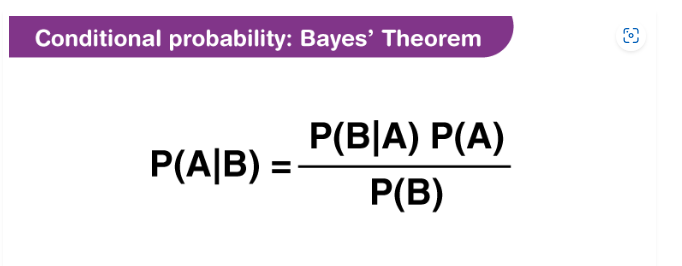

## Naive Baye Theorem:

step 1:

- It will take take the Attributes/columns break them into frequency and likehood table 


Step 2:

- From the likelihood table the frequency of yes and No is calculated... # Which is greater


## Types of Naive Bayes
-----------------------------------
1. Gaussian:

The Gaussian model assumes that features follow a **normal distribution**. This means if predictors take continuous values instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution.

------------------------------------
2. Multinomial:

The Multinomial Naive Bayes classifier is used when the data is **multinomial distributed**. It is primarily used for document classification problems, 

It means a particular document belongs to which category such as Sports, Politics, education, etc. The classifier uses the frequency of words for the predictors.

-----------
3. Bernoulli:

The Bernoulli classifier works similar to the Multinomial classifier, but the predictor variables are the independent Booleans variables. Such as if a particular word is present or not in a document. This model is also famous for document classification tasks.

# Irish Dataset

In [1]:
from IPython.display import Image

# get the image
Image(url="https://machinelearninghd.com/wp-content/uploads/2021/03/iris-dataset.png", width=900, height=400)

In [2]:
# import library

import numpy as np # Numerical Python Library
import pandas as pd # Data Manipulation and Analysis Library
import matplotlib.pyplot as plt # Python 2D ploting Library
import seaborn as sns # built on the top of Python Library for ploting

# import Scientific Python Library
import scipy.stats
from scipy.stats import zscore # remove outliers or data having more than 3rd standard deviation 
from scipy.stats import percentileofscore, ttest_1samp, ttest_ind, chi2_contingency # various scientific tests within columns

# import machine learning library
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # for Encoding data from categorical to numerical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # metrics to check error
from sklearn.model_selection import train_test_split # train and test Model

from sklearn.naive_bayes import MultinomialNB # Classification Model
from sklearn.linear_model import LinearRegression, LogisticRegression # Linear Models for regression and classification task
from sklearn.neighbors import KNeighborsClassifier # classification Model

# import warnings
import warnings
warnings.filterwarnings("ignore") # to stop udpate warnings 

In [3]:
# loading dataset from scikit learn
from sklearn.datasets import load_iris

ds=load_iris()
ds

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
ds.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
ds.items()

dict_items([('data', array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4,

In [7]:
df=pd.DataFrame(data=ds.data,columns=ds.feature_names)
df['target']=ds.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Multivariate Graph

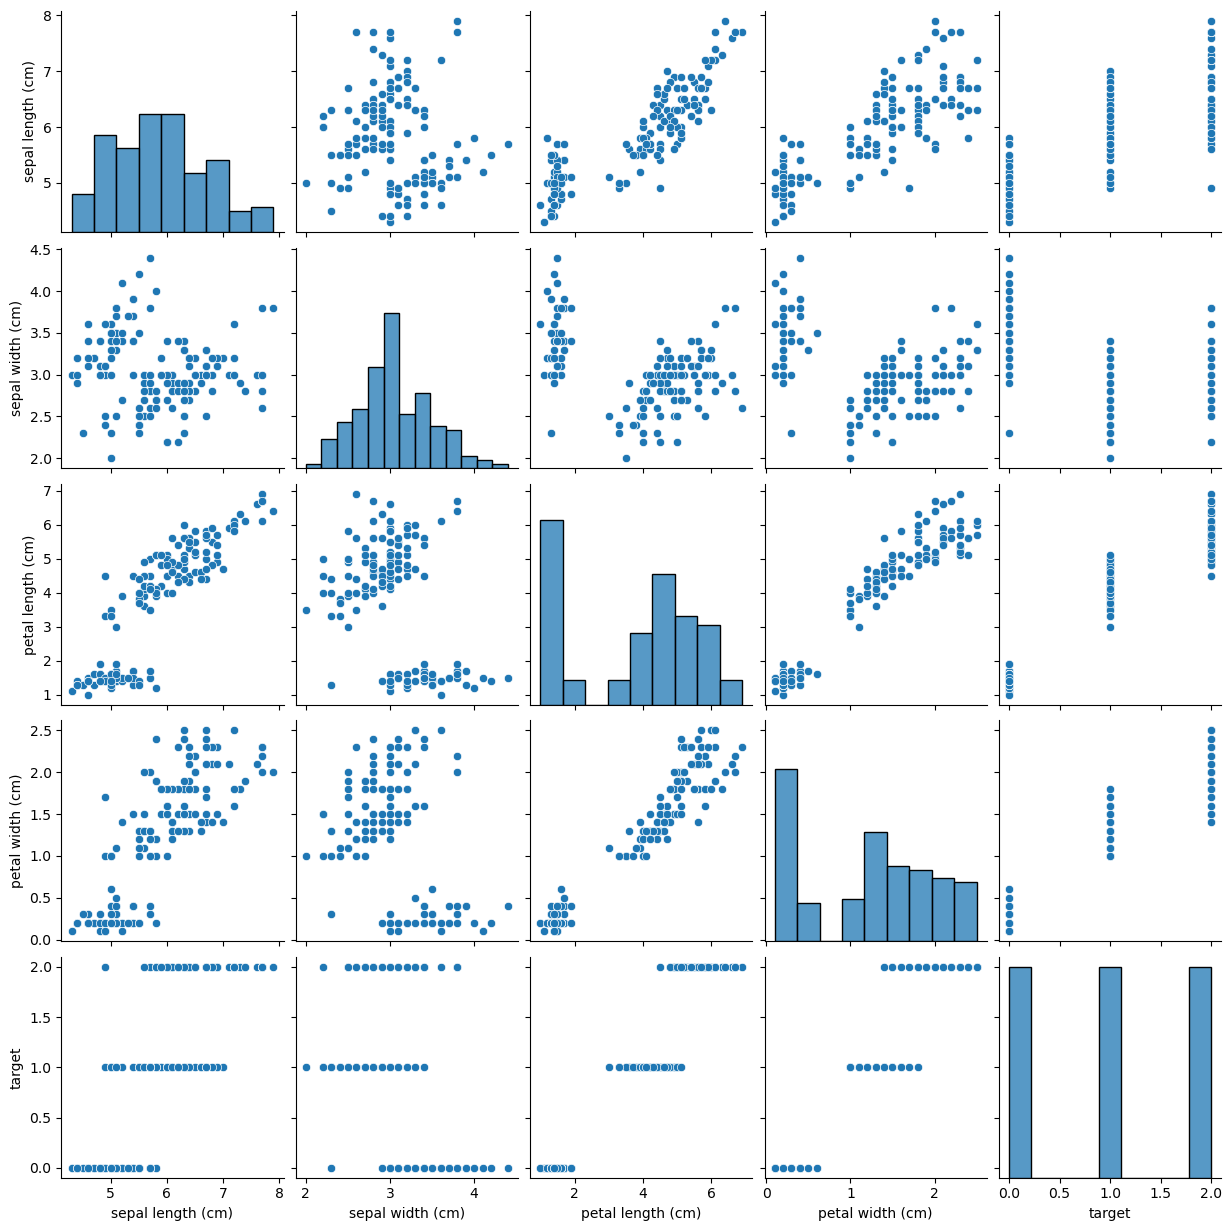

In [8]:
sns.pairplot(df)

In [9]:
x=ds.data
x[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [10]:
y=ds.target
y[0:4]

array([0, 0, 0, 0])

In [11]:
# data divided for train and test 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=43)

# checking shape
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(117, 4) (117,)
(33, 4) (33,)


# Naive_Bayes MultinomialNB

- As more than 2 category variable

In [12]:
# calling MultinomialNB from Sklearn
from sklearn.naive_bayes import MultinomialNB

# creating instance
mnb=MultinomialNB()

# Model Training
mnb.fit(train_x,train_y)

MultinomialNB()

In [13]:
# Prediction Saved on pred_mnb
pred_mnb=mnb.predict(test_x)

In [14]:
# testing the accuracy_score(original-predicted)
print(accuracy_score(test_y,pred_mnb))

1.0


In [15]:
# genrate prediction report
print("Classification_Score\n",classification_report(test_y,pred_mnb))

Classification_Score
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



<Axes: >

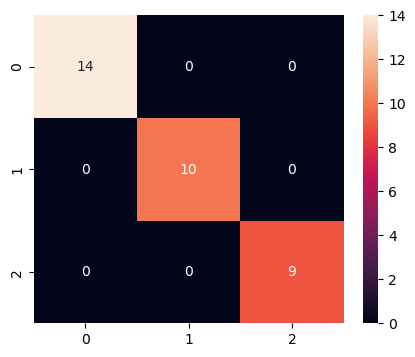

In [16]:
# graph showing confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(test_y,pred_mnb),annot=True)

In [17]:
# classification Report
print(classification_report(test_y,pred_mnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



---------
# KNeighbors Classifiers
------

Parameters

- sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

- https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

In [18]:
# calling KNeighbors classifier from sklearn 
from sklearn.neighbors import KNeighborsClassifier

# create instance
knn=KNeighborsClassifier()

# train model
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [19]:
# predict saved in pred_knn
pred_knn=knn.predict(test_x)

Accuracy_Score : 1.0
Classification_report
-------------------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

Confusion Matrix
-------------------------------------------------



<Axes: >

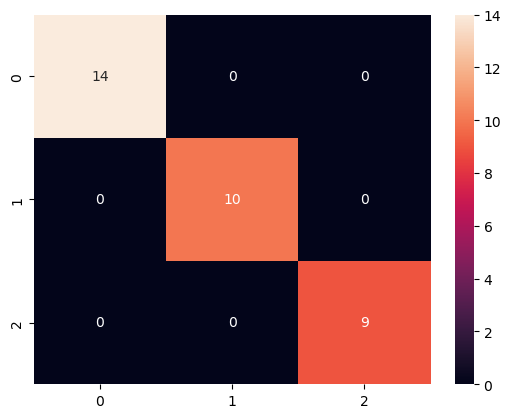

In [20]:
# check accuracy-score
print("Accuracy_Score :",accuracy_score(test_y,pred_knn))

#classification Report
print("Classification_report\n-------------------------------------------\n",
     classification_report(test_y,pred_knn))

# confusion Matrix
print("Confusion Matrix\n-------------------------------------------------\n")

# checking the graph of confusion Matrix
sns.heatmap(confusion_matrix(test_y,pred_knn),annot=True)

-------------------------
# Decision Tree Classifier
------------

- Root Node: Most Import will be the root note
- Branch Node: Important columns will be Branch Node
- Leaf Node: Answers {yes/No}

In [21]:
# loading Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# create instance
dtc=DecisionTreeClassifier(criterion='log_loss')# going with default parameters

# training model
dtc.fit(train_x,train_y)

DecisionTreeClassifier(criterion='log_loss')

In [22]:
# score genrated in training
dtc.score(train_x,train_y)

1.0

In [23]:
# predict data
pred_dtc=dtc.predict(test_x)

In [24]:
# Using Matrix
print("Accuracy Score",accuracy_score(test_y,pred_dtc))
print("\nClassification Report\n----------------------------------\n",classification_report(test_y,pred_dtc))
print("\nConfusion Matrix\n----------------------------------------\n",confusion_matrix(test_y,pred_dtc))

Accuracy Score 0.9090909090909091

Classification Report
----------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.82      0.90      0.86        10
           2       0.88      0.78      0.82         9

    accuracy                           0.91        33
   macro avg       0.90      0.89      0.89        33
weighted avg       0.91      0.91      0.91        33


Confusion Matrix
----------------------------------------
 [[14  0  0]
 [ 0  9  1]
 [ 0  2  7]]


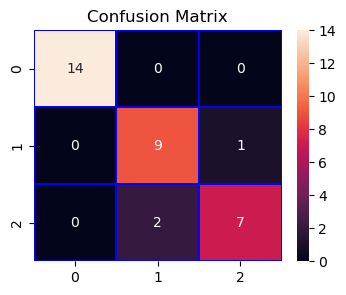

In [25]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(test_y,pred_dtc),annot=True,linewidths=0.3,linecolor='b')
plt.title("Confusion Matrix")
plt.show()

----------------------------------------------------------------------

# Support Vector Machine
------------------------------------

Svm is an exciting algorithm and the concepts are relatively simple. The classifier seperates data points using a hyperplane with the largest amount of margin. Svm finds an optimal hyperplane which helps in classifying nw data points.


1. Support Vectors:

Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by claculating margins. These points are more relevent to the construction of the classifier.

2. Hyperplane:
     
     - A hyperplane is a decision plane which seperates between a set of objects having different class memberships.

3. Margins:
- A margin is a gap between the two lines on the closest class points. This is calculated as the particular distance from the line to support vectors or closest points. If margin is larger in between the classes, then it is considered a good margin, a smaller margin is bad margin



sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [26]:
# calling SVC from sklearn. Support Vector Machine
from sklearn.svm import SVC

# create instance
svm=SVC() # kernal default is rbf (radial base function)

# Model training
svm.fit(train_x,train_y)

SVC()

In [27]:
svm.score(train_x,train_y)

0.9658119658119658

In [28]:
pred_svm=svm.predict(test_x)
# pred_svc hold prediction values

Accuracy_Score:  0.9393939393939394

Classifiction Report
----------------------------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      1.00      0.91        10
           2       1.00      0.78      0.88         9

    accuracy                           0.94        33
   macro avg       0.94      0.93      0.93        33
weighted avg       0.95      0.94      0.94        33


Confusion Matrix
-----------------------------------------------



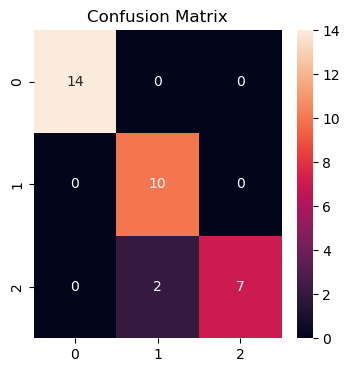

In [29]:
print("Accuracy_Score: ",accuracy_score(test_y,pred_svm))
print("\nClassifiction Report\n----------------------------------------------\n",classification_report(test_y,pred_svm))

# ploting graph for confusion Matrix
print("\nConfusion Matrix\n-----------------------------------------------\n")
plt.figure(figsize=(4,4))
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(test_y,pred_svm),annot=True)
plt.show()

<Axes: >

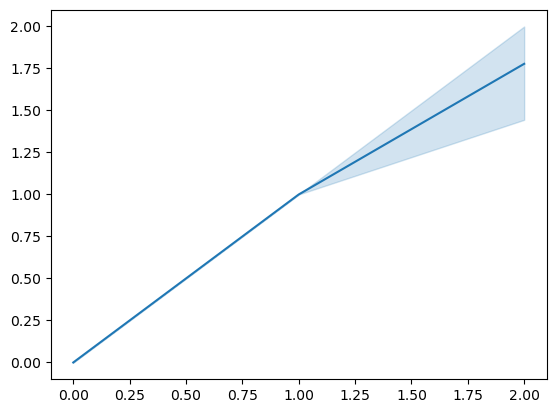

In [31]:
sns.lineplot(x=test_y,y=pred_svm)

### SVC By function

In [32]:
def svckernal(ker):
    svc=SVC(kernel=ker)
    svc.fit(train_x,train_y)
    print("Model_Score: ",svc.score(train_x,train_y))
    predsvc=svc.predict(test_x)
    print("Accuracy_Score:",accuracy_score(test_y,predsvc))
    print("\nClassification Report\n---------------------------\n",classification_report(test_y,predsvc))
    print("\nConfusion Matrix\n--------------------------------\n",confusion_matrix(test_y,predsvc))

In [33]:
svckernal('poly')

Model_Score:  0.9829059829059829
Accuracy_Score: 1.0

Classification Report
---------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33


Confusion Matrix
--------------------------------
 [[14  0  0]
 [ 0 10  0]
 [ 0  0  9]]


In [34]:
svckernal('sigmoid')

Model_Score:  0.3504273504273504
Accuracy_Score: 0.2727272727272727

Classification Report
---------------------------
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        10
           2       0.27      1.00      0.43         9

    accuracy                           0.27        33
   macro avg       0.09      0.33      0.14        33
weighted avg       0.07      0.27      0.12        33


Confusion Matrix
--------------------------------
 [[ 0  0 14]
 [ 0  0 10]
 [ 0  0  9]]


In [35]:
svckernal('linear')

Model_Score:  0.9914529914529915
Accuracy_Score: 1.0

Classification Report
---------------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33


Confusion Matrix
--------------------------------
 [[14  0  0]
 [ 0 10  0]
 [ 0  0  9]]


### However observation Shows {kernal-Linear works the best} as accuracy =1

In [36]:
df1=pd.DataFrame(data=pred_svm,columns=['Predicted'])
df1.head()

,Predicted
0,0
1,0
2,1
3,1
4,2


In [37]:
# saved the predicted Data
df1.to_csv("SVC_savedPrediction.csv")

# Regression Models

- DecisionTreeRegressor
- Support Vector Regressor
- KNeighbors Regressor
- Support Vector Regressor


# classification Models

- DecisionTreeClassifier
- KNeighborsClassifier
- SVC
- GaussianNB, MultinomialNB,

"**************************--------------------------------------------------------------------------------------------------------------------------------------------------********************"

# Import Read about 

- NAIVE BAYES
- KNeighbors
- Decision Tree
- SVC

- Auc_Roc Curve